In [1]:
!pip install openpyxl

  Using cached https://files.pythonhosted.org/packages/f0/da/572cbc0bc582390480bbd7c4e93d14dc46079778ed915b505dc494b37c57/jdcal-1.4.1-py2.py3-none-any.whl


In [2]:
import os
import io
import collections
import pandas as pd
import matplotlib.pyplot as plt
from rdflib import ConjunctiveGraph
from rdflib.plugins.sparql.results.csvresults import CSVResultSerializer

pd.set_option('display.max_colwidth', 200)

if not os.path.exists('outputs'):
    os.makedirs('outputs')
    
g = ConjunctiveGraph()
g.parse('data.trig', format='trig')

def query(q):
    serializer = CSVResultSerializer(g.query(q))
    output = io.BytesIO()
    serializer.serialize(output)
    return pd.read_csv(io.StringIO(output.getvalue().decode('utf-8')), encoding='utf-8')
    
def write(df, fn):
    df.to_excel('outputs/{}'.format(fn), encoding='utf-8')

In [3]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?date ?ri_acronym ?ri_website ?ri_domain ?rep_label WHERE {
    ?g dcterms:date ?date .
    GRAPH ?g { 
        ?ri a rm:ResearchInfrastructure .
        ?ri envri:acronym ?ri_acronym . 
        ?ri envri:website ?ri_website .
        ?ri envri:hasDomain ?ri_domain .
        ?ri envri:hasRepository ?rep .
        ?rep a envri:Repository .
        ?rep rdfs:label ?rep_label .
    }
    # FILTER (?date > "2019-01-01"^^xsd:date)
    FILTER (?ri_acronym = "ICOS")
}
""")

display(q)
write(q, 'output-1repos.xlsx')

,date,ri_acronym,ri_website,ri_domain,rep_label
0,2019-04-01,ICOS,http://www.icos-cp.eu,n771,Carbon Portal


In [4]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?vocab_name ?vocab_iri WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasVocabularies [
           envri:hasName ?vocab_name ;
           envri:hasVocabularyIri ?vocab_iri 
         ]
       ]
}
""")

display(q)
write(q, 'output-2.xlsx')

,rep_label,vocab_name,vocab_iri
0,CLOUDNET,CF-standard names,http://cfconventions.org/latest.html
1,EARLINET Database,CF Standard Names,http://cfconventions.org/
2,ASC,CF-standard names,http://cfconventions.org/latest.html
3,EISCAT Schedule,http://envri.eu/ns/none,https://www.wikidata.org/entity/Q513000
4,ACTRIS-ACCESS,CF standard names,http://cfconventions.org/latest.html
5,IAGOS repository,CF Standard Names,http://cfconventions.org/standard-names.html
6,Madrigal,Cedar,https://www.eiscat.se/madrigal/cedarFormat.pdf
7,local EU-EIDA,SEED,https://ds.iris.edu/ds/nodes/dmc/data/formats/seed/
8,norwegian Meteorological Institute,http://envri.eu/ns/NULL,https://github.com/steingod/scivocab/
9,SeaDataNet Common DAta Index (CDI),SeaDataNet CDI,https://cdi.seadatanet.org


In [5]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>

SELECT ?p WHERE {
    ?p envri:relatesTo fairterms:A1.2 .
}
""")

display(q)
write(q, 'output-3.xlsx')

,p
0,http://envri.eu/ns/maintainsOwnUserDatabase
1,http://envri.eu/ns/hasAuthenticationMethod
2,http://envri.eu/ns/contentAccessAuthorizationRequired
3,http://envri.eu/ns/usesAuthorisationTechnique


In [6]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-4.xlsx')

,l,p,o,li
0,LW (Marine) Marine Data Archive metadata schema,http://envri.eu/ns/hasSchemaName,http://envri.eu/ns/EML2.0,NaN
1,eLTER DEIMS-SDR metadata schema,http://envri.eu/ns/hasSchemaName,https://www.wikidata.org/entity/Q50377276,NaN
2,ICOS Carbon Portal metadata schema,http://envri.eu/ns/hasSchemaName,http://envri.eu/ns/GeoDCAT,NaN
3,ACTRIS ACTRIS-ACCESS metadata schema,http://envri.eu/ns/hasSchemaName,http://envri.eu/ns/NasaAmesASCII,NaN
4,EPOS EPOS CSW metadata schema,http://envri.eu/ns/hasSchemaName,https://www.wikidata.org/entity/Q28600460,NaN
...,...,...,...,...
304,ACTRIS EARLINET Database vocabularies,http://envri.eu/ns/hasSpecificationLanguage,https://www.wikidata.org/entity/Q2115,NaN
305,LifeWatch LifeWatch Italy Portal vocabularies,http://envri.eu/ns/hasSpecificationLanguage,http://envri.eu/ns/SKOS,NaN
306,ICOS Carbon Portal vocabularies,http://envri.eu/ns/hasSpecificationLanguage,https://www.wikidata.org/entity/Q826165,NaN
307,SDN SeaDataNet Common DAta Index (CDI) vocabularies,http://envri.eu/ns/hasSpecificationLanguage,https://www.w3.org/XML/,NaN


In [7]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?schema_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName ?schema_name
           ]
         ]
       ]
}
""")

display(q)
write(q, 'output-5.xlsx')

,rep_label,schema_name
0,CLOUDNET,http://envri.eu/ns/LocalSchema
1,EARLINET Database,https://www.wikidata.org/entity/Q50377276
2,ASC,https://www.wikidata.org/entity/Q30079268
3,EISCAT Schedule,http://envri.eu/ns/none
4,ACTRIS-ACCESS,http://envri.eu/ns/NasaAmesASCII
5,MySQL,https://www.wikidata.org/entity/Q28600460
6,IAGOS repository,http://envri.eu/ns/INSPIRE
7,Madrigal,http://envri.eu/ns/none
8,local EU-EIDA,http://envri.eu/ns/SEED
9,norwegian Meteorological Institute,https://www.wikidata.org/entity/Q50377276


In [8]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I1_metadata.xlsx')

,l,p,o,li
0,LW (Marine) Marine Data Archive metadata schema,http://envri.eu/ns/hasSchemaName,http://envri.eu/ns/EML2.0,NaN
1,eLTER DEIMS-SDR metadata schema,http://envri.eu/ns/hasSchemaName,https://www.wikidata.org/entity/Q50377276,NaN
2,ICOS Carbon Portal metadata schema,http://envri.eu/ns/hasSchemaName,http://envri.eu/ns/GeoDCAT,NaN
3,ACTRIS ACTRIS-ACCESS metadata schema,http://envri.eu/ns/hasSchemaName,http://envri.eu/ns/NasaAmesASCII,NaN
4,EPOS EPOS CSW metadata schema,http://envri.eu/ns/hasSchemaName,https://www.wikidata.org/entity/Q28600460,NaN
...,...,...,...,...
304,ACTRIS EARLINET Database vocabularies,http://envri.eu/ns/hasSpecificationLanguage,https://www.wikidata.org/entity/Q2115,NaN
305,LifeWatch LifeWatch Italy Portal vocabularies,http://envri.eu/ns/hasSpecificationLanguage,http://envri.eu/ns/SKOS,NaN
306,ICOS Carbon Portal vocabularies,http://envri.eu/ns/hasSpecificationLanguage,https://www.wikidata.org/entity/Q826165,NaN
307,SDN SeaDataNet Common DAta Index (CDI) vocabularies,http://envri.eu/ns/hasSpecificationLanguage,https://www.w3.org/XML/,NaN


In [9]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1persistency.xlsx')

,l,p,o,li
0,SDN repository,http://envri.eu/ns/hasPersistencyGuaranty,stewardship,NaN
1,ANAEE-France repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/planned,NaN
2,eLTER repository,http://envri.eu/ns/hasPersistencyGuaranty,ownership,NaN
3,eLTER repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/planned,NaN
4,EPOS repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/none,NaN
5,EPOS repository,http://envri.eu/ns/hasPersistencyGuaranty,ownership,NaN
6,LW (Marine) repository,http://envri.eu/ns/hasPersistencyGuaranty,stewardship,NaN
7,EPOS repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/none,NaN
8,ACTRIS repository,http://envri.eu/ns/hasPersistencyGuaranty,10 years,NaN
9,ACTRIS repository,http://envri.eu/ns/hasPersistencyGuaranty,ownership,NaN


In [10]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A2nix.xlsx')

,l,p,o,li


In [11]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1.1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1_1access.xlsx')

,l,p,o,li
0,SDN SeaDataNet Common DAta Index (CDI) access mechanism,http://envri.eu/ns/supportsAccessTechnology,http://www.wikidata.org/entity/Q628566,NaN
1,ACTRIS ACTRIS-ACCESS access mechanism,http://envri.eu/ns/supportsAccessTechnology,https://www.wikidata.org/entity/Q8777,NaN
2,eLTER EUDAT/FZJ B2SHARE access mechanism,http://envri.eu/ns/supportsAccessTechnology,http://envri.eu/ns/LocalLDAP,NaN
3,EPOS VERCE Seismic Forward Modeling Experimental Data access mechanism,http://envri.eu/ns/supportsAccessTechnology,file:///home/jovyan/fixed/fairness-assessment/http,NaN
4,EPOS local EU-EIDA access mechanism,http://envri.eu/ns/supportsAccessTechnology,https://www.wikidata.org/entity/Q193424,NaN
...,...,...,...,...
62,SIOS norwegian Polar Data Centre access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN
63,Euro-Argo Euro-Argo Data access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN
64,EISCAT Madrigal access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN
65,LW (Marine) EUROBIS access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN


In [12]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1.2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1_2accesstechn.xlsx')

,l,p,o,li
0,SDN SeaDataNet Common DAta Index (CDI) access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN
1,ACTRIS ACTRIS-ACCESS access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,false,NaN
2,ACTRIS EARLINET Database access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN
3,eLTER EUDAT/FZJ B2SHARE access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN
4,EPOS VERCE Seismic Forward Modeling Experimental Data access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN
...,...,...,...,...
98,SIOS norwegian Polar Data Centre access mechanism,http://envri.eu/ns/usesAuthorisationTechnique,http://envri.eu/ns/none-open,NaN
99,Euro-Argo Euro-Argo Data access mechanism,http://envri.eu/ns/usesAuthorisationTechnique,https://www.wikidata.org/entity/Q513000,NaN
100,EISCAT Madrigal access mechanism,http://envri.eu/ns/usesAuthorisationTechnique,http://envri.eu/ns/none,NaN
101,LW (Marine) EUROBIS access mechanism,http://envri.eu/ns/usesAuthorisationTechnique,http://envri.eu/ns/SSQLService,NaN


In [13]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I2vocab.xlsx')

,l,p,o,li
0,LW (Marine) EUROBIS vocabularies,http://envri.eu/ns/hasVocabularyIri,http://www.marineregions.org/,NaN
1,ACTRIS GRES vocabularies,http://envri.eu/ns/hasVocabularyIri,http://cfconventions.org/latest.html,NaN
2,SDN SeaDataNet Central Data Products vocabularies,http://envri.eu/ns/hasVocabularyIri,http://standards.iso.org/ittf/PubliclyAvailableStandards/ISO_19139_Schemas/resources/codelist/ML_gmxCodelists.xml,NaN
3,ICOS Carbon Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://purl.org/dc/elements/1.1/,NaN
4,ACTRIS ASC vocabularies,http://envri.eu/ns/hasVocabularyIri,http://cfconventions.org/latest.html,NaN
...,...,...,...,...
65,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,true,NaN
66,ACTRIS CLOUDNET metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,false,NaN
67,ACTRIS ASC metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,partially,NaN
68,EPOS local EU-EIDA metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,true,NaN


In [14]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I3.xlsx')

,l,p,o,li


In [15]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1.xlsx')

,l,p,o,li


In [16]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_1_license.xlsx')

,l,p,o,li
0,SDN repository,http://envri.eu/ns/hasPolicies,n690,http://envri.eu/ns/DataUsage
1,ANAEE-France repository,http://envri.eu/ns/hasPolicies,http://envri.eu/ns/none,NaN
2,eLTER repository,http://envri.eu/ns/hasPolicies,http://envri.eu/ns/none,NaN
3,EPOS repository,http://envri.eu/ns/hasPolicies,n202,http://envri.eu/ns/Acknowledgements
4,EPOS repository,http://envri.eu/ns/hasPolicies,n202,http://envri.eu/ns/Citation
...,...,...,...,...
137,EPOS Terradue access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN
138,Euro-Argo Euro-Argo Data access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN
139,EISCAT Madrigal access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN
140,LW (Marine) EUROBIS access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN


In [17]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_2prov.xlsx')

,l,p,o,li
0,SDN SeaDataNet Central Data Products metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
1,EPOS VERCE Seismic Forward Modeling Experimental Data metadata,http://envri.eu/ns/hasMachineReadableProvenance,true,NaN
2,EPOS RESIF (France) metadata,http://envri.eu/ns/hasMachineReadableProvenance,machine readable provenance,NaN
3,LW (Marine) Marine Data Archive metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
4,ICOS Carbon Portal metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
5,EISCAT EISCAT Schedule metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
6,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
7,ACTRIS GRES metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
8,EPOS MySQL metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
9,ACTRIS EARLINET Database metadata,http://envri.eu/ns/hasMachineReadableProvenance,true,NaN


In [18]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_3.xlsx')

,l,p,o,li
0,VERCE Seismic Forward Modeling Experimental Data data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
1,ANAEE-France Metadata Catalog data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
2,CLOUDNET data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
3,GRES data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
4,EPOS INGV data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
5,norwegian Meteorological Institute data management plans,http://envri.eu/ns/hasComplianceValidationService,true,NaN
6,EUROBIS data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
7,EPOS CSW data management plans,http://envri.eu/ns/hasComplianceValidationService,true,NaN
8,ACTRIS-ACCESS data management plans,http://envri.eu/ns/hasComplianceValidationService,http://envri.eu/ns/none,NaN
9,SeaDataNet Central Data Products data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN


In [19]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F1ID.xlsx')

,l,p,o,li
0,EISCAT Madrigal identifier,http://envri.eu/ns/isAssigned,https://www.wikidata.org/entity/Q513000,NaN
1,EPOS European Federated Data Archive identifier,http://envri.eu/ns/isAssigned,automatically,NaN
2,SIOS norwegian Polar Data Centre identifier,http://envri.eu/ns/isAssigned,automatically,NaN
3,eLTER DEIMS-SDR identifier,http://envri.eu/ns/isAssigned,automatically,NaN
4,SDN SeaDataNet Common DAta Index (CDI) identifier,http://envri.eu/ns/isAssigned,automatically,NaN
...,...,...,...,...
83,EPOS EPOS CSW identifier,http://envri.eu/ns/usesProvider,http://envri.eu/ns/none,NaN
84,LW (Marine) Marine Data Archive identifier,http://envri.eu/ns/usesProvider,https://www.wikidata.org/entity/Q58333293,NaN
85,EPOS VERCE Seismic Forward Modeling Experimental Data identifier,http://envri.eu/ns/usesProvider,http://envri.eu/ns/none,NaN
86,EPOS Terradue identifier,http://envri.eu/ns/usesProvider,https://www.wikidata.org/entity/Q22661177,NaN


In [20]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F2machinereadab.xlsx')

,l,p,o,li
0,SDN SeaDataNet Central Data Products metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,http://seadatanet.maris2.nl/v_cdi_v3/print_xml.asp?n_code=2626292,NaN
1,EPOS VERCE Seismic Forward Modeling Experimental Data metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,http://envri.eu/ns/planned,NaN
2,LW (Marine) Marine Data Archive metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,http://www.lifewatch.be/en/imis?module=dataset&dasid=1841&show=eml,NaN
3,ICOS Carbon Portal metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,https://hdl.handle.net/11676/-ffoiHjX5NDN0Vq_fKuVmas0,NaN
4,EISCAT EISCAT Schedule metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,https://www.wikidata.org/entity/Q513000,NaN
...,...,...,...,...
76,SDN SeaDataNet Common DAta Index (CDI) metadata schema,http://envri.eu/ns/includesProvenanceFields,n652,http://envri.eu/ns/TextOnly
77,ACTRIS GRES metadata schema,http://envri.eu/ns/includesProvenanceFields,http://envri.eu/ns/planned,NaN
78,EPOS European Federated Data Archive metadata schema,http://envri.eu/ns/includesProvenanceFields,http://envri.eu/ns/none,NaN
79,eLTER DEIMS-SDR metadata schema,http://envri.eu/ns/includesProvenanceFields,n360,http://envri.eu/ns/TextOnly


In [21]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F3pidsincl.xlsx')

,l,p,o,li
0,SDN SeaDataNet Central Data Products metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN
1,EPOS VERCE Seismic Forward Modeling Experimental Data metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,partially,NaN
2,EPOS RESIF (France) metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,partially,NaN
3,LW (Marine) Marine Data Archive metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN
4,ICOS Carbon Portal metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN
5,EISCAT EISCAT Schedule metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,https://www.wikidata.org/entity/Q513000,NaN
6,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN
7,ACTRIS GRES metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN
8,EPOS MySQL metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN
9,ACTRIS EARLINET Database metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN


In [22]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F4 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F4sofware.xlsx')

,l,p,o,li
0,SDN SeaDataNet Central Data Products metadata,http://envri.eu/ns/supportsExternalSearchEngineTypes,n689,http://envri.eu/ns/Geoportal
1,SDN SeaDataNet Central Data Products metadata,http://envri.eu/ns/supportsExternalSearchEngineTypes,n689,http://envri.eu/ns/IODEOceanDataPortal
2,EPOS VERCE Seismic Forward Modeling Experimental Data metadata,http://envri.eu/ns/supportsExternalSearchEngineTypes,http://envri.eu/ns/none,NaN
3,LW (Marine) Marine Data Archive metadata,http://envri.eu/ns/supportsExternalSearchEngineTypes,http://envri.eu/ns/planned,NaN
4,ICOS Carbon Portal metadata,http://envri.eu/ns/supportsExternalSearchEngineTypes,n802,https://www.wikidata.org/entity/Property:P5305
...,...,...,...,...
208,EPOS repository,http://envri.eu/ns/hasRepositoryUrl,http://seismology.resif.fr/#WelcomePlace,NaN
209,ACTRIS repository,http://envri.eu/ns/hasRepositoryUrl,https://data.eurochamp.org,NaN
210,SDN repository,http://envri.eu/ns/hasRepositoryUrl,https://cdi.seadatanet.org/search,NaN
211,LW (Marine) repository,http://envri.eu/ns/hasRepositoryUrl,http://www.marinedataarchive.org/,NaN


,count
GeoTIFF,1
ASCII,5
NetCDF/CF,9
NetCDF CF,9
NetCDF,9
Raster data,1
comma-separated values,5
JavaScript Object Notation,2
MiniSEED,4
NaN,3


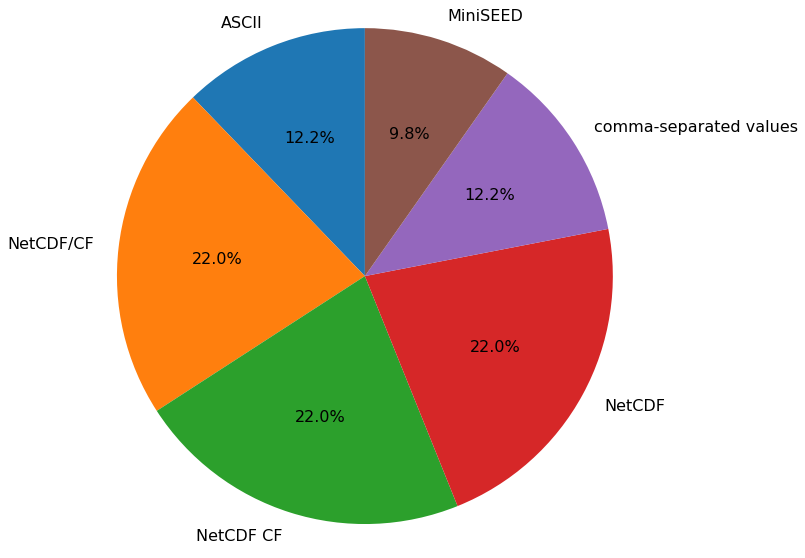

In [10]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?format_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasData [
           envri:hasPreferredFormat [
             envri:hasFormatName [ rdfs:label ?format_name ]
          ]
         ]
       ]
} 
# GROUP BY ?format_name
""")

# display(q)
write(q, 'output-6format.xlsx')

c = collections.Counter(q['format_name'])

display(pd.DataFrame.from_dict(dict(c), orient='index', columns=['count']))

c = {x : c[x] for x in c if c[x] >= 4}

labels = list(c.keys())
sizes = list(c.values())

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
ax1.axis('equal')

#total = sum(sizes)
#plt.legend(
#    loc='upper left',
#    labels=['%s, %1.1f%%' % (
#        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
#    prop={'size': 11},
#    bbox_to_anchor=(1, 1),
#    bbox_transform=fig1.transFigure
#)

fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever
plt.show()

In [4]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 

SELECT ?ri_acronym ?ri_domain ?rep_label ?rep_kind ?rep_soft WHERE {
    ?ri a rm:ResearchInfrastructure .
    ?ri envri:acronym ?ri_acronym . 
    ?ri envri:hasDomain [ rdf:li [ rdfs:label ?ri_domain ] ] .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep a [ rdfs:label ?rep_kind ] .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesSoftware [ rdf:li [ rdfs:label ?rep_soft ] ]
    
    FILTER (?rep_kind != "Repository")
}
""")

display(q)

,ri_acronym,ri_domain,rep_label,rep_kind,rep_soft
0,LW (Marine),marine,EUROBIS,data repository,relational database
1,IAGOS,Atmosphere,IAGOS repository,data repository,Custom
2,IAGOS,Atmosphere,IAGOS repository,metadata repository,Custom
3,EISCAT,Atmosphere,Madrigal,data repository,Custom
4,EPOS,earth,MySQL,data repository,relational database
5,EISCAT,Atmosphere,EISCAT Schedule,data repository,Custom
6,SIOS,Atmosphere,norwegian Meteorological Institute,data repository,Custom
7,SIOS,ecosystem,norwegian Meteorological Institute,data repository,Custom
8,Euro-Argo,marine,Euro-Argo Data,data repository,NetAPP
9,ICOS,marine,Carbon Portal,metadata repository,iRODS


In [3]:
# Diese abfrage bringt keine vollständigen Ergebnisse... warum weiß ich nicht
# MS: In wiefern ist diese nicht vollständig?

q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 

SELECT ?ri_acronym ?ri_domain ?rep_label ?persistence WHERE {
    ?ri a rm:ResearchInfrastructure .
    ?ri envri:acronym ?ri_acronym . 
    ?ri envri:hasDomain [ rdf:li [ rdfs:label ?ri_domain ] ] .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:hasPersistencyGuaranty  [ rdfs:label ?persistence ] 
}
""")

display(q)

,ri_acronym,ri_domain,rep_label,persistence
0,EPOS,earth,Terradue,NaN
1,IAGOS,Atmosphere,IAGOS repository,NaN
2,EPOS,earth,MySQL,NaN
3,SIOS,Atmosphere,norwegian Meteorological Institute,NaN
4,SIOS,ecosystem,norwegian Meteorological Institute,NaN
5,EPOS,earth,European Federated Data Archive,none
6,EPOS,earth,EPOS INGV,NaN
7,ANAEE-France,ecosystem,ANAEE-France Metadata Catalog,planned
8,eLTER,ecosystem,eLTER CDN,planned
9,ACTRIS,Atmosphere,GRES,NaN


In [15]:
# da kommt eine leere Tabelle raus...
# MS: Das hat damit zu tun, dass es nur ein identifier system gibt, keine Liste und weil envri:Identifier nun eine Wikidata Klasse ist (wd:Q853614)

q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?ri_domain ?rep_label ?id_system WHERE {
    ?ri a rm:ResearchInfrastructure .
    ?ri envri:acronym ?ri_acronym . 
    ?ri envri:hasDomain [ rdf:li [ rdfs:label ?ri_domain ] ] .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesIdentifier ?id .
    ?id a wd:Q853614 .
    ?id envri:usesIdentifierSystem [ rdfs:label ?id_system ]
}
""")

display(q)

,ri_acronym,ri_domain,rep_label,id_system
0,LW (Marine),marine,EUROBIS,digital object identifier
1,LW (Marine),marine,EUROBIS,none
2,EPOS,earth,Terradue,none
3,IAGOS,Atmosphere,IAGOS repository,digital object identifier
4,EISCAT,Atmosphere,Madrigal,void type
5,EPOS,earth,MySQL,NaN
6,EISCAT,Atmosphere,EISCAT Schedule,void type
7,SIOS,Atmosphere,norwegian Meteorological Institute,Universally Unique Identifier
8,SIOS,ecosystem,norwegian Meteorological Institute,Universally Unique Identifier
9,Euro-Argo,marine,Euro-Argo Data,digital object identifier


In [6]:
# ebenso hier
# MS: Auch hier, dataLicenseIri ist keine Liste

q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 

SELECT ?ri_acronym ?ri_domain ?rep_label ?licence WHERE {
    ?ri a rm:ResearchInfrastructure .
    ?ri envri:acronym ?ri_acronym . 
    ?ri envri:hasDomain [ rdf:li [ rdfs:label ?ri_domain ] ] .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:hasAccessMechanisms ?acc .
    ?acc a envri:AccessMechanism .
    ?acc envri:dataLicenseIri ?licence
}
""")

display(q)

,ri_acronym,ri_domain,rep_label,licence
0,EPOS,earth,Terradue,https://creativecommons.org/licenses/
1,EPOS,earth,EPOS CSW,http://purl.org/eprint/accessRights/OpenAccess
2,SDN,marine,SeaDataNet Central Data Products,https://www.seadatanet.org/Data-Access/License/1.0
3,EPOS,earth,MySQL,http://envri.eu/ns/NULL
4,eLTER,ecosystem,DEIMS-SDR,http://envri.eu/ns/NULL
5,SIOS,ecosystem,norwegian Polar Data Centre,http://envri.eu/ns/NULL
6,SIOS,Atmosphere,norwegian Polar Data Centre,http://envri.eu/ns/NULL
7,SDN,marine,SeaDataNet Common DAta Index (CDI),https://www.seadatanet.org/Data-Access/License/1.0
8,Euro-Argo,marine,Euro-Argo Data,https://creativecommons.org/licenses/by/4.0/
9,ACTRIS,Atmosphere,GRES,http://envri.eu/ns/none


In [9]:
# das gleiche trifft hier zu
# MS: envri:Data ist jetzt einen Wikidata term (wd:Q42848)

q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?ri_domain ?rep_label ?dataschema WHERE {
    ?ri a rm:ResearchInfrastructure .
    ?ri envri:acronym ?ri_acronym . 
    ?ri envri:hasDomain [ rdf:li [ rdfs:label ?ri_domain ] ] .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:hasData ?data .
    ?data a wd:Q42848 .
    ?data envri:dataSchemaIsRegistered [ rdf:li [ rdfs:label ?dataschema ] ] 
}
""")

display(q)

,ri_acronym,ri_domain,rep_label,dataschema
0,EPOS,earth,EPOS CSW,INSPIRE
1,EPOS,earth,EPOS CSW,Earth sciences
2,EPOS,earth,EPOS CSW,openGIS
3,IAGOS,Atmosphere,IAGOS repository,local registry
4,IAGOS,Atmosphere,IAGOS repository,local registry
5,ACTRIS,Atmosphere,ACTRIS - In-Situ unit,CEDA
6,ACTRIS,Atmosphere,ACTRIS-ACCESS,CEDA
7,LW (Marine),marine,EUROBIS,Darwin Core Archive
8,LW (Marine),marine,EUROBIS,OBIS event scheme
